# Lab 2 – Essential Tools and Practices for Programming Projects in AI

TP of Timothée POULY

Author: Rim Slama Salmi

Last modified: September 14, 2025

**Objectives**
- Manage virtual environments properly (with Conda or venv) to ensure reproducibility.
- Set up a Python project following best practices.
- Use Git and GitHub to ensure collaborative project tracking.
- Apply collaborative work with branch management and conflict resolution
  
**Resources**

- [Getting started with VS Code](https://code.visualstudio.com/docs/getstarted/getting-started)  
- [Create a conda environment in the terminal](https://code.visualstudio.com/docs/python/environments#_create-a-conda-environment-in-the-terminal)  
- [Git management in Visual Studio Code](https://code.visualstudio.com/docs/sourcecontrol/overview)  



## 01 - Project setup (virtual env & Git/Github)

### 1.1 Load and open the project folder in VS Code
- Load DSPAP_Lab2 from Moodle
- Rename it to **DSPAP_Lab2_YourName**
- Open **VS Code** → `File` → `Open Folder…` → select **DSPAP_Lab2_YourName**  


### 1.2 Activate Lab2 environment or create it from `.yml` file  

- In the VS Code terminal, make sure you have a dedicated environment for **Lab2**.  

👉 If it does not exist yet, create it with:  
- Option 1: If you already have a Lab2.yml file, you can recreate the environment directly:
```bash
conda env create -f Lab2.yml
```
- Option2: Create it for the first time with:  
```bash
conda create -n Lab2_yourName python=3.11 numpy pandas matplotlib pyyaml scikit-learn ipykernel
```



### 1.3 Start version control
- VS Code interface: open the Source Control panel → Initialize Repository → Stage → Commit

- Command line:
```bash
    git init
    git add .
    git commit -m "Initial commit"
```

### 1.4 Connect to GitHub
- Publish repository from VS Code → choose your account → set Private visibility


### 1.5 Add a .gitignore (if not already)
- Create a .gitignore file and include:*.txt
- Commit with message

### 1.6 Sync changes to GitHub
- In the Source Control panel, click Sync Changes (🔄)

 
## 2 – Best Practices in AI Project Management & Code
⚠️ All operations must be tracked with explicit commits.


- This lab uses a reduced subset of the Open Food Facts (France) database, which you already worked with in Lab 1.
- For this session, we focus on a France-specific subset containing selected columns on metadata, nutrients, and scores.
- The dataset provided (cleaned.csv) has already been cleaned, with missing values removed.

In [1]:
#Imports 
# THIS CELL IS ONLY FOR IMPORTS DO NOT CHANGE IT
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
import yaml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys

In [2]:
#paths
DATASET_PATH="../data/cleaned.csv"
YML_path = "../config/config.yaml"

### 2.1 Project organization

👉 Instruction:  
- Rename your project folder to **DSPAP_Lab2_YourName** (*replace `YourName` with your own name*).  
- If some of your files have names that are not meaningful (e.g. `test1.ipynb`, `data123.csv`), **rename them with clear, descriptive names** (e.g. `data_cleaned.csv`, `analysis.ipynb`).  
- Then, place your files into a clean and consistent folder structure, here an example of good structure:

  
    DSPAP_Lab2/

    ├─ data/           # datasets

    ├─ notebooks/      # Jupyter notebooks

    ├─ src/            # Python modules (.py)

    ├─ config/         # configuration files

    └─ README.md


### 2.2 **Load** the dataset from cleaned.csv, **display** a few sample rows, and **check** the shape of the data (number of rows and columns).
Load the CSV into a DataFrame `df`. 
 Use the `pd.read_csv()` function. 

 Explore it 

In [3]:
# TODO 2.2
# 1. Load the dataset from 'cleaned.csv' into a DataFrame (use pandas)
# 2. Display the first few rows of the dataset
# 3. Print the shape of the dataset (rows, columns)

df = pd.read_csv(DATASET_PATH)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121501 entries, 0 to 121500
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   product_name               121501 non-null  object 
 1   brands                     121501 non-null  object 
 2   pnns_groups_1              121501 non-null  object 
 3   pnns_groups_2              121501 non-null  object 
 4   energy-kcal_100g           121501 non-null  float64
 5   sugars_100g                121501 non-null  float64
 6   fat_100g                   121501 non-null  float64
 7   saturated-fat_100g         121501 non-null  float64
 8   salt_100g                  121501 non-null  float64
 9   fiber_100g                 121501 non-null  float64
 10  proteins_100g              121501 non-null  float64
 11  nutriscore_grade           121501 non-null  object 
 12  nova_group                 121501 non-null  float64
 13  environmental_score_grade  12

,product_name,brands,pnns_groups_1,pnns_groups_2,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,salt_100g,fiber_100g,proteins_100g,nutriscore_grade,nova_group,environmental_score_grade,unique_scans_n
0,Madeleines ChocoLait,Apple bandit,Sugary snacks,Biscuits and cakes,460.0,31.00,24.00,6.000,0.4800,1.40,6.40,e,4.0,d,1.0
1,Collagen For Her,Bodylab,unknown,unknown,123.0,0.00,1.76,0.882,0.0882,1.76,1.76,unknown,4.0,unknown,6.0
2,Lindt Vollmilch Schokolade,Lindt,unknown,unknown,6.0,0.20,0.30,0.200,0.8000,0.10,0.30,unknown,4.0,unknown,2.0
3,Multi Patents Collagen Peptides,VEV,Sugary snacks,Biscuits and cakes,350.0,9.09,0.00,0.000,0.0000,0.00,90.90,a,3.0,b,1.0
4,Fondants Citron,Lindt,Sugary snacks,Sweets,249.0,59.00,0.30,0.050,0.0500,2.00,0.50,d,4.0,b,12.0


### 2.2 Remember and execute PCA main operations from TP1 


From the full dataset, we now focus on a subset of **nutritional features** that will be used for analysis and modeling.  
We create a clean DataFrame with only these columns, extract the underlying numerical values into a NumPy array `X`, and check its shape (rows × columns).

1. **Select features**  
   - Nutrients: `sugars_100g`, `fat_100g`, `salt_100g`, `proteins_100g`, `energy-kcal_100g`, `fiber_100g`  
   - Drop rows with missing values before building the feature matrix.

2. **Standardize**  
   - Use `StandardScaler` to center and scale features.  
   - Standardization is important because nutrients are in different units (g, kcal, etc.).  
   - 📖 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

3. **Fit PCA**  
   - Run `PCA()` on the standardized data.  
   - Plot both the explained variance ratio (per component) and the cumulative ratio.  
   - These show how much information each principal component captures.  
   - 📖 [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

   sugars_100g  fat_100g  salt_100g  proteins_100g  energy-kcal_100g  \
0        31.00     24.00     0.4800           6.40             460.0   
1         0.00      1.76     0.0882           1.76             123.0   
2         0.20      0.30     0.8000           0.30               6.0   
3         9.09      0.00     0.0000          90.90             350.0   
4        59.00      0.30     0.0500           0.50             249.0   

   fiber_100g  
0        1.40  
1        1.76  
2        0.10  
3        0.00  
4        2.00  
   sugars_100g  fat_100g  salt_100g  proteins_100g  energy-kcal_100g  \
0     0.827808  0.519854  -0.077727      -0.089863         -0.002869   
1    -0.621031 -0.525722  -0.127392      -0.412073         -0.002869   
2    -0.611684 -0.594361  -0.037164      -0.513458         -0.002869   
3    -0.196194 -0.608465  -0.138572       5.777966         -0.002869   
4     2.136437 -0.594361  -0.132234      -0.499569         -0.002869   

   fiber_100g  
0   -0.278157  
1   -0

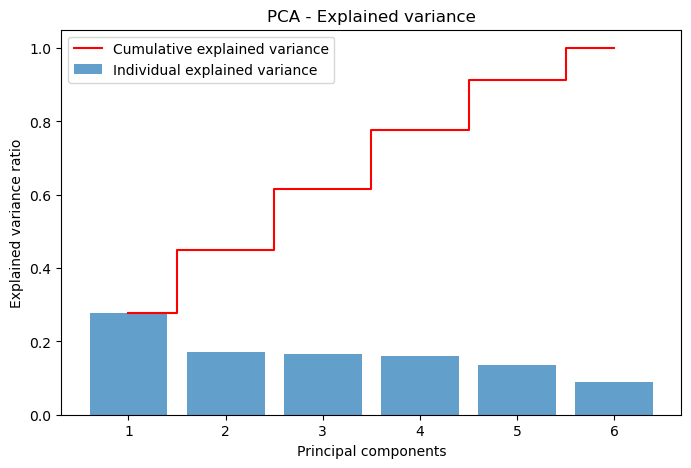

In [4]:
#(run this cell)
#1. **Select features**  
nutritional_features = [
    "sugars_100g",
    "fat_100g",
    "salt_100g",
    "proteins_100g",
    "energy-kcal_100g",
    "fiber_100g"
]

df_nutrition = df[nutritional_features].dropna()

print(df_nutrition.head())


#2. **Standardize**  
scaler = StandardScaler()
df_nutrition_scaled = pd.DataFrame(
    scaler.fit_transform(df_nutrition),
    columns=nutritional_features,
    index=df_nutrition.index
)

print(df_nutrition_scaled.head())


#3. **Fit PCA**  
pca = PCA()
pca.fit(df_nutrition_scaled)


# **Explained Ratio*  
explained_var = pca.explained_variance_ratio_


# cumulative explained variance ratio
cumulative_explained_var = explained_var.cumsum()

#display Correlation circle
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label="Individual explained variance")
plt.step(range(1, len(explained_var)+1), explained_var.cumsum(), where="mid", label="Cumulative explained variance", color="red")
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.title("PCA - Explained variance")
plt.legend()
plt.show()

### 2.3 Display PCA correlation circle (axes 1–2) from TP1.

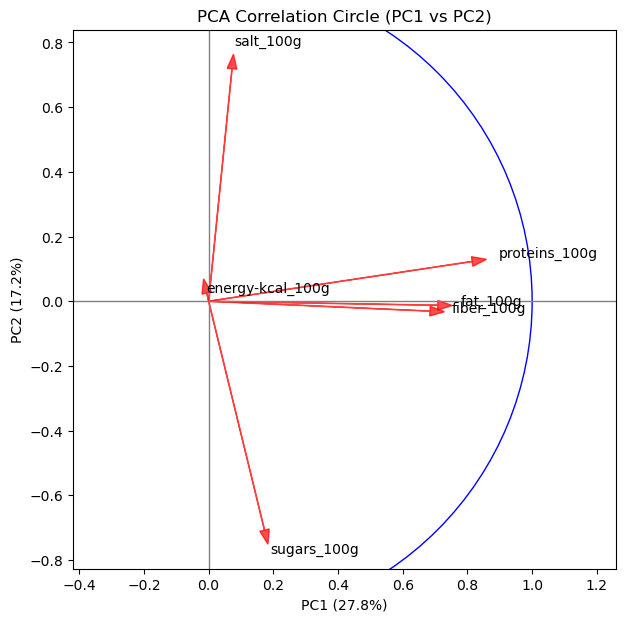

In [5]:
#(run this cell)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)


circle = plt.Circle((0,0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)


for i, col in enumerate(df_nutrition_scaled.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], 
              color='red', alpha=0.7, head_width=0.03)
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, col, color='black')

plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}%)")
plt.title("PCA Correlation Circle (PC1 vs PC2)")
plt.axis("equal")
plt.show()

### 2.4 Write a commented function to automate correlation circle display and give example usage for axes 1–2, 2–3, 1-3.
💡 *Hints & Recommendations:*  
- Use **snake_case** for the function name and variables.
- Add a **docstring** at the start of your function explaining what it does, its inputs, and outputs.  
- Comment important steps inside the function (data extraction, plotting, labeling).  
- Test your function with different axes combinations: (1–2), (2–3), (1–3).  
  
Here’s how to write a clean and well-documented function that adds two numbers:
```python
def add_two_numbers(a, b):
    """
    Return the sum of two numbers.

    Parameters
    ----------
    a : int or float
        First number.
    b : int or float
        Second number.

    Returns
    -------
    int or float
        The sum of a and b.
    """
    # Add the two inputs
    result = a + b

    # Return the result
    return result
```
Example usage
```python
print(add_two_numbers(3, 5))     # 8
```

In [6]:
# TODO 2.4
def plot_correlation_circle(pca, features, axis1=1, axis2=2):
    """
    Displays a PCA correlation circle for two selected axes.

    pca: PCA object already fitted
    features: list of variable names (columns)
    axis1: first axis (1-indexed)
    axis2: second axis (1-indexed)
    """
    # Loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Indices Python (0-indexed)
    x_axis = axis1 - 1
    y_axis = axis2 - 1

    plt.figure(figsize=(7,7))
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)

    # Circle with R=1
    circle = plt.Circle((0,0), 1, color='blue', fill=False)
    plt.gca().add_artist(circle)

    # Arrows for each feature
    for i, col in enumerate(features):
        plt.arrow(0, 0, loadings[i, x_axis], loadings[i, y_axis], 
                  color='red', alpha=0.7, head_width=0.03, length_includes_head=True)
        plt.text(loadings[i, x_axis]*1.1, loadings[i, y_axis]*1.1, col, color='black')

    plt.xlabel(f"PC{axis1} ({pca.explained_variance_ratio_[x_axis]*100:.1f}%)")
    plt.ylabel(f"PC{axis2} ({pca.explained_variance_ratio_[y_axis]*100:.1f}%)")
    plt.title(f"PCA Correlation Circle (PC{axis1} vs PC{axis2})")
    plt.axis("equal")
    plt.show()


### 2.4 Place the function inside the corresponding folder, in a dedicated Python module. 

In [7]:
####TODO
#The file is plot_correlation_circle.py and it is located in the src folder in the project structure

### 2.5  Import the function you created from the Python file in the `src/` folder.  Call it to display the **correlation circle for PCA axes 1 and 3**.  

💡 Example of importing a function from a Python module
  ```python
  from folder.module_name import function_name
```
💡 Recommendation:
To avoid errors if the file or function is not found, wrap your import in a try/except block


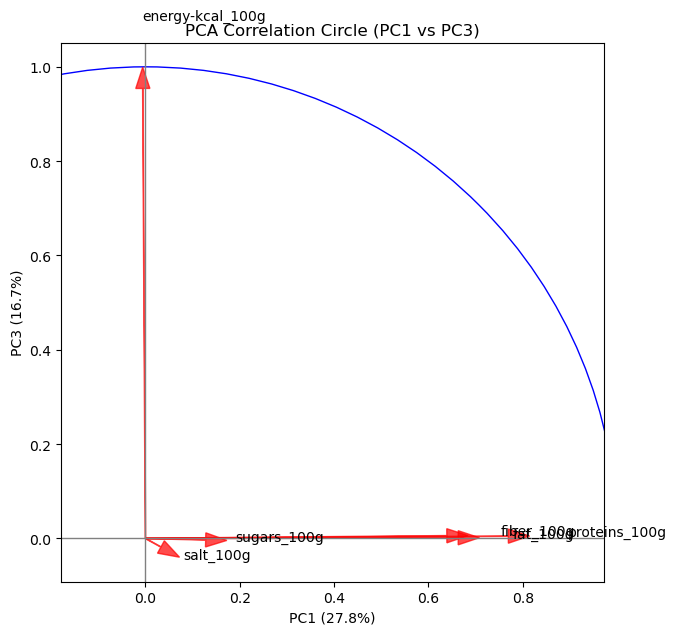

In [8]:
### TODO

sys.path.append("../src")

from plot_correlation_circle import plot_correlation_circle

plot_correlation_circle(pca, nutritional_features, axis1=1, axis2=3)



### 2.6 Update notebook to read CSV path and number of PCA components from config.yaml
- **Reload** the dataset from the path specified in YAML.  
- Get `data_path` and `n_components` from config  
- **Redo** the **PCA** on your feature matrix `X` using the number of components defined in YAML and display the new dataset with the proposed n_components.  

- Tuto
📘 [Working with YAML in Python (blog.stephane-robert.info)](https://blog.stephane-robert.info/docs/developper/programmation/python/yaml/)  


In [23]:

### TODO 2.6
with open("../config/config.yaml", "r") as f:
    config = yaml.safe_load(f)

data_path = config["data"]["path"]
n_components = config["pca"]["n_components"]

df = pd.read_csv(data_path)

feats = ["sugars_100g", "fat_100g", "salt_100g", "proteins_100g", "energy-kcal_100g", "fiber_100g"]
df_nutrition = df[feats].dropna()

df_scaled = pd.DataFrame(scaler.fit_transform(df_nutrition), columns=feats, index=df_nutrition.index)

pca2 = PCA(n_components=n_components)
pca2.fit(df_scaled)

NewDataset2 = pd.DataFrame(
    pca2.components_.T,
    index=feats,
    columns=[f"PC{i+1}" for i in range(pca2.components_.shape[0])]
)

display("NewDataset2", NewDataset2)


'NewDataset2'

,PC1,PC2
sugars_100g,0.133721,-0.695724
fat_100g,0.548348,-0.012242
salt_100g,0.055980,0.706894
proteins_100g,0.630652,0.120821
energy-kcal_100g,-0.004477,0.024861
fiber_100g,0.529676,-0.030038


### 2.7 Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**
📝 A simple guide to get started with markdown:  
[Markdown Basic Syntax (markdownguide.org)](https://www.markdownguide.org/basic-syntax/)

In [ ]:
#TODO
#Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**

## 3 – Collaboration and Sharing with Git/GitHub

### 3.1 Share the project
•	Student 1 shares their GitHub project and adds Student 2 as collaborator.
•	Student 2 clones the project.


### 3.2 Create the environment
•	Inside VS Code terminal:
•	conda env create -f environment.yml
•	conda activate Lab2_name


### 3.3 Collaborative work (on Student 1’s project)
•	From now on, each pair works only on Student 1’s project.
•	Student 1 and Student 2 create separate branches to collaboratively write the README:

- Branch feature1_projectInfo (Student 1):
  - Project Title & Description – what the project does
  - Author(s) – contributors and contact info
  - Citation/License – mention that this comes from Angelo Furno’s course
- Branch feature2_projectSetUp (Student 2):
  - Installation – environment setup (Lab2_name)
  - Usage – how to run notebooks
  - Results – main outputs/metrics (optional)
  - Project Structure – short folder overview



### 3.4 Sync & merge
•	Push contributions to GitHub.
•	Merge branches into main to obtain a complete README.
•	Handle merge conflicts directly in VS Code if needed.


### 3.5 Practice: working with branchs

- Create a new branch (e.g. `save_pca`) from your main branch.  
- On this branch, add the option to **save the PCA-reduced dataset** with 4 components into a CSV file.  
- Commit your changes and push the branch.  
- Later, you can merge this branch into `main` if everything works correctly.  

### 3.5 (Optional) Organizing Work into Functionalities and Branches
- Go back to your TP1 project. 
- Identify 3 to 4 main functionalities. 
- Team up with one or two colleagues, assign the functionalities among you, and develop each one in a separate branch. 
- Once the work is done, merge all the branches into the main project.

## 4 – Reflection on AI and Ethics

### Ethical Reflection Exercise  

**Context:**  
A company wants to use the **Open Food Facts dataset (France)** to build an AI system that recommends food products to consumers.  
The dataset includes nutritional values, NutriScore grades, environmental scores, and brand information.  

**Objective:**  
Help consumers make healthier and more sustainable food choices.  

**Task (20 minutes):**  
Work in groups of 3 and apply the **7-step ethical reflection framework**:  

1. **Understand the situation** – define context, objectives, key facts.  
2. **Generate solutions** – brainstorm at least 3 alternatives.  
3. **Identify stakeholders** – list all affected groups.  
4. **Assess impacts** – analyze positive and negative impacts for each solution.  
5. **Apply ethical filter** – check fairness, safety, privacy, transparency.  
6. **Make a decision** – select one solution as a group.  
7. **Final ethical check** – Would you trust this system? Would you defend the decision publicly?  


In [ ]:
#TODO solution 

---

🎉 Good job! The lab is finished here ! 

You now know how to structure a project, use GitHub, and ensure reproducibility.  
And remember: working with AI also means thinking about **ethics** .  
